<a href="https://colab.research.google.com/github/PYH1107/generative_ai/blob/main/%EF%BC%A8%EF%BC%B72.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DNN手寫辨識作業 note
## 1. DNN是做什麼的？
DNN（Deep Neural Network，深度神經網路）是一種具有多層神經元的機器學習模型。在本作業中，DNN用於手寫數字辨識任務，主要工作原理是：

1. 透過多層神經元結構學習輸入圖像的特徵表示
2. 每一層神經元從前一層提取更高階的特徵
3. 最終輸出層產生對10個數字類別的預測機率
4. 通過大量訓練資料的學習，模型能夠識別人類手寫的數字

## 2. MNIST
 MNIST（Modified National Institute of Standards and Technology）是一個經典的手寫數字資料集，被視為機器學習領域的「Hello World」。以下是關於MNIST的詳細資訊：
- 基本資訊
  1. 內容：由手寫數字0-9的灰階圖像組成
  2. 規模：共有70,000張圖像
    - 60,000張訓練圖像
    - 10,000張測試圖像
  3. 圖像尺寸：28×28像素（每張圖像有784個像素點）
  4. 資料格式：灰階圖像，每個像素值範圍為0-255（0為白色，255為黑色）

- 在本次 DNN 手寫辨識作業中，MNIST提供了：
  - 訓練資料：用於教導模型識別不同數字的特徵
  - 驗證資料：用於調整模型參數，防止過擬合
  - 測試資料：用於評估最終模型的性能


  ## 3. 新添加： dropout

**解釋**：Dropout是一種防止過擬合的正則化技術，在訓練過程中隨機"關閉"一定比例的神經元。例如：

```python
model.add(Dropout(0.3))
```

這表示在訓練過程中隨機關閉30%的神經元，迫使網路學習更穩健的特徵，從而提高泛化能力。



# 作業說明

> prompt 1: （截圖講義p.115~112，並配上作業規範）「請為我生成實驗流程與步驟說明。」


## 1. 作業實踐步驟與實驗流程
作業可以拆分為以下步驟：

1. 資料準備
  - 載入MNIST手寫數字資料集
  - 資料正規化（將像素值縮放到0-1之間）
  - 將標籤轉換為one-hot編碼


2. 資料分割
  - 將資料分為訓練集、驗證集和測試集

3. 模型設計
  - 設計DNN架構（注意：不能是三層架構）
  - 選擇適當的激活函數
  - 加入正規化技術（如Dropout）

4. 模型訓練
  - 設定批次大小、訓練回合數等參數
  - 使用訓練集進行模型訓練
  - 使用驗證集監控訓練過程

5. 參數調整實驗
  - 嘗試不同神經元數量
  - 調整層數和層結構
  - 測試不同的正規化參數
  - 比較不同優化器的效果


6. 結果分析
  - 繪製訓練和驗證準確率曲線
  - 分析不同參數設定下的模型表現
  - 找出最佳參數組合


* (optional) Gradio界面實作
  - 建立互動式手寫數字辨識界面
  - 測試模型在真實手寫輸入上的表現

## 2. 實驗項目
> prompt 2 （參考老師程式碼，寫出雛形）「請指出建議增添實驗項目之處」

> prompt 3「請為我加上註解，並將圖片標題改成英文」

## 3. 比較項目說明

| 特性           | Model 1 (基礎模型)            | Model 2 (不同優化器)           | Model 3 (更深網路)            | Model 4 (小批次)             |
| ------------ | ------------------------- | ------------------------- | ------------------------- | ------------------------- |
| **網路架構**     | 512→256→128→10            | 512→256→128→10            | 512→**384**→256→128→10    | 512→256→128→10            |
| **隱藏層數量**    | 3層                        | 3層                        | **4層**                    | 3層                        |
| **優化器**      | Adam                      | **SGD (momentum=0.9)**    | Adam                      | Adam                      |
| **批次大小**     | 128                       | 128                       | 128                       | **64**                    |
| **學習率**      | 0.001                     | **0.01**                  | 0.001                     | 0.001                     |
| **Dropout率** | 0.3, 0.2, 0.1             | 0.3, 0.2, 0.1             | 0.3, **0.25**, 0.2, 0.1   | 0.3, 0.2, 0.1             |


In [2]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 105.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [6]:
# 載入MNIST資料集
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 查看資料形狀
print(f"訓練資料集: {x_train.shape}")  # (60000, 28, 28)
print(f"測試資料集: {x_test.shape}")   # (10000, 28, 28)

# 資料前處理
# 將2D圖像(28x28)轉換為1D向量(784)
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# 正規化像素值到0-1之間
x_train = x_train / 255.0
x_test = x_test / 255.0

# 標籤轉換為one-hot編碼
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

訓練資料集: (60000, 28, 28)
測試資料集: (10000, 28, 28)


In [9]:
# 實驗結果記錄
results = []

In [10]:
# ====== 實驗1: 基本4層網路架構 ======
print("\n開始實驗1: 基本4層網路...")

model1 = Sequential([
    Dense(512, input_dim=784, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(10, activation='softmax')
])

model1.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# 顯示模型摘要
model1.summary()

# 訓練模型
history1 = model1.fit(
    x_train, y_train,
    batch_size=128,
    epochs=15,
    validation_data=(x_test, y_test),
    verbose=1
)

# 評估模型
test_loss1, test_acc1 = model1.evaluate(x_test, y_test)
print(f"實驗1測試準確率: {test_acc1*100:.2f}%")
results.append({"實驗": "1-基本4層網路", "架構": "512-256-128-10", "優化器": "Adam(0.001)",
                "批次大小": 128, "準確率": test_acc1*100})


開始實驗1: 基本4層網路...


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.8268 - loss: 0.5516 - val_accuracy: 0.9620 - val_loss: 0.1239
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9601 - loss: 0.1318 - val_accuracy: 0.9730 - val_loss: 0.0855
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9724 - loss: 0.0915 - val_accuracy: 0.9739 - val_loss: 0.0824
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9759 - loss: 0.0783 - val_accuracy: 0.9771 - val_loss: 0.0751
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9789 - loss: 0.0663 - val_accuracy: 0.9801 - val_loss: 0.0663
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9826 - loss: 0.0541 - val_accuracy: 0.9821 - val_loss: 0.0630
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9839 - loss: 0.0506 - val_accuracy: 0.9817 - val_loss: 0.0647
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9849 - loss: 0.0469 - val

In [11]:
# ====== 實驗2: 使用SGD優化器 ======
print("\n開始實驗2: SGD優化器...")

model2 = Sequential([
    Dense(512, input_dim=784, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(10, activation='softmax')
])

model2.compile(loss='categorical_crossentropy',
              optimizer=SGD(learning_rate=0.01, momentum=0.9),
              metrics=['accuracy'])

# 訓練模型
history2 = model2.fit(
    x_train, y_train,
    batch_size=128,
    epochs=15,
    validation_data=(x_test, y_test),
    verbose=1
)

# 評估模型
test_loss2, test_acc2 = model2.evaluate(x_test, y_test)
print(f"實驗2測試準確率: {test_acc2*100:.2f}%")
results.append({"實驗": "2-使用SGD優化器", "架構": "512-256-128-10", "優化器": "SGD(0.01)",
                "批次大小": 128, "準確率": test_acc2*100})


開始實驗2: SGD優化器...
Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.6905 - loss: 0.9748 - val_accuracy: 0.9406 - val_loss: 0.2002
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9295 - loss: 0.2401 - val_accuracy: 0.9580 - val_loss: 0.1348
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9501 - loss: 0.1714 - val_accuracy: 0.9668 - val_loss: 0.1063
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9582 - loss: 0.1353 - val_accuracy: 0.9708 - val_loss: 0.0939
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9648 - loss: 0.1146 - val_accuracy: 0.9755 - val_loss: 0.0810
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9708 - loss: 0.0981 - val_accuracy: 0.9760 - val_loss: 0.0788
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9739 - loss: 0.0850 - val_accuracy: 0.9770 - val_loss: 0.0731
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9762 - loss

In [12]:
# ====== 實驗3: 5層網路架構 ======
print("\n開始實驗3: 5層網路架構...")

model3 = Sequential([
    Dense(512, input_dim=784, activation='relu'),
    Dropout(0.3),
    Dense(384, activation='relu'),
    Dropout(0.25),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(10, activation='softmax')
])

model3.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# 訓練模型
history3 = model3.fit(
    x_train, y_train,
    batch_size=128,
    epochs=15,
    validation_data=(x_test, y_test),
    verbose=1
)

# 評估模型
test_loss3, test_acc3 = model3.evaluate(x_test, y_test)
print(f"實驗3測試準確率: {test_acc3*100:.2f}%")
results.append({"實驗": "3-5層網路架構", "架構": "512-384-256-128-10", "優化器": "Adam(0.001)",
                "批次大小": 128, "準確率": test_acc3*100})


開始實驗3: 5層網路架構...
Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.8057 - loss: 0.6140 - val_accuracy: 0.9608 - val_loss: 0.1262
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9552 - loss: 0.1494 - val_accuracy: 0.9712 - val_loss: 0.0946
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9668 - loss: 0.1104 - val_accuracy: 0.9703 - val_loss: 0.1003
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9733 - loss: 0.0891 - val_accuracy: 0.9786 - val_loss: 0.0759
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9777 - loss: 0.0756 - val_accuracy: 0.9799 - val_loss: 0.0723
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9793 - loss: 0.0661 - val_accuracy: 0.9810 - val_loss: 0.0688
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9824 - loss: 0.0585 - val_accuracy: 0.9782 - val_loss: 0.0736
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9833 

In [13]:
# ====== 實驗4: 調整批次大小 ======
print("\n開始實驗4: 較小批次大小...")

model4 = Sequential([
    Dense(512, input_dim=784, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(10, activation='softmax')
])

model4.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# 訓練模型
history4 = model4.fit(
    x_train, y_train,
    batch_size=64,  # 較小批次大小
    epochs=15,
    validation_data=(x_test, y_test),
    verbose=1
)

# 評估模型
test_loss4, test_acc4 = model4.evaluate(x_test, y_test)
print(f"實驗4測試準確率: {test_acc4*100:.2f}%")
results.append({"實驗": "4-較小批次大小", "架構": "512-256-128-10", "優化器": "Adam(0.001)",
                "批次大小": 64, "準確率": test_acc4*100})


開始實驗4: 較小批次大小...
Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.8483 - loss: 0.4795 - val_accuracy: 0.9677 - val_loss: 0.1044
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9602 - loss: 0.1307 - val_accuracy: 0.9687 - val_loss: 0.0972
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.9696 - loss: 0.0998 - val_accuracy: 0.9769 - val_loss: 0.0771
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.9733 - loss: 0.0838 - val_accuracy: 0.9778 - val_loss: 0.0813
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9775 - loss: 0.0701 - val_accuracy: 0.9744 - val_loss: 0.0847
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9799 - loss: 0.0631 - val_accuracy: 0.9782 - val_loss: 0.0691
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9826 - loss: 0.0553 - val_accuracy: 0.9799 - val_loss: 0.0695
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9846


All Experiment Results:
                Experiment        Architecture    Optimizer  Batch Size  \
0  1-Basic 4-layer Network      512-256-128-10  Adam(0.001)         128   
2        3-5-layer Network  512-384-256-128-10  Adam(0.001)         128   
1          2-SGD Optimizer      512-256-128-10    SGD(0.01)         128   
3     4-Smaller Batch Size      512-256-128-10  Adam(0.001)          64   

    Accuracy  
0  98.339999  
2  98.329997  
1  98.299998  
3  98.220003  

Best Model: 1-Basic 4-layer Network
Accuracy: 98.34%


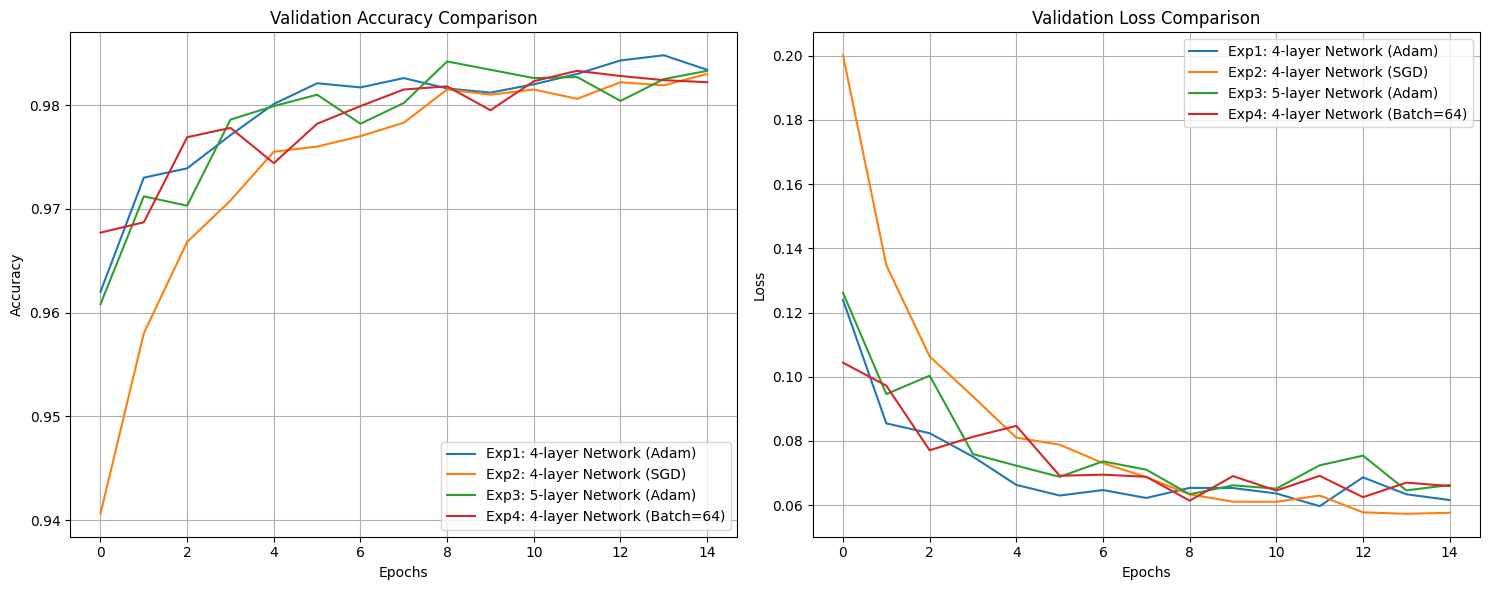

In [19]:
# Display all experiment results
results = [
    {"Experiment": "1-Basic 4-layer Network", "Architecture": "512-256-128-10", "Optimizer": "Adam(0.001)",
     "Batch Size": 128, "Accuracy": test_acc1*100},
    {"Experiment": "2-SGD Optimizer", "Architecture": "512-256-128-10", "Optimizer": "SGD(0.01)",
     "Batch Size": 128, "Accuracy": test_acc2*100},
    {"Experiment": "3-5-layer Network", "Architecture": "512-384-256-128-10", "Optimizer": "Adam(0.001)",
     "Batch Size": 128, "Accuracy": test_acc3*100},
    {"Experiment": "4-Smaller Batch Size", "Architecture": "512-256-128-10", "Optimizer": "Adam(0.001)",
     "Batch Size": 64, "Accuracy": test_acc4*100}
]

results_df = pd.DataFrame(results)
print("\nAll Experiment Results:")
print(results_df.sort_values("Accuracy", ascending=False))

# Find the best model
best_idx = results_df["Accuracy"].idxmax()
best_model_info = results_df.iloc[best_idx]
print(f"\nBest Model: {best_model_info['Experiment']}")
print(f"Accuracy: {best_model_info['Accuracy']:.2f}%")

# Visualize comparison of different models learning curves
plt.figure(figsize=(15, 6))

# Accuracy comparison
plt.subplot(1, 2, 1)
plt.plot(history1.history['val_accuracy'], label='Exp1: 4-layer Network (Adam)')
plt.plot(history2.history['val_accuracy'], label='Exp2: 4-layer Network (SGD)')
plt.plot(history3.history['val_accuracy'], label='Exp3: 5-layer Network (Adam)')
plt.plot(history4.history['val_accuracy'], label='Exp4: 4-layer Network (Batch=64)')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss comparison
plt.subplot(1, 2, 2)
plt.plot(history1.history['val_loss'], label='Exp1: 4-layer Network (Adam)')
plt.plot(history2.history['val_loss'], label='Exp2: 4-layer Network (SGD)')
plt.plot(history3.history['val_loss'], label='Exp3: 5-layer Network (Adam)')
plt.plot(history4.history['val_loss'], label='Exp4: 4-layer Network (Batch=64)')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('learning_curves_comparison.png')
plt.show()

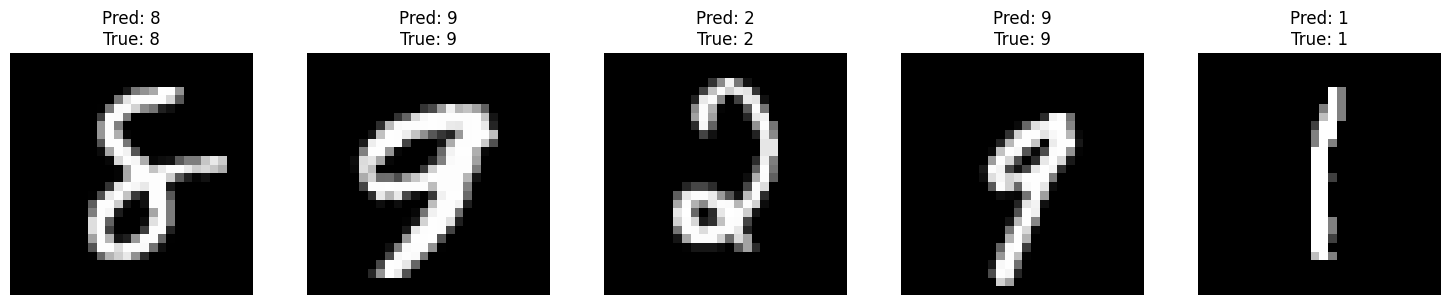

Experiment completed!


In [21]:
# Use the best model for prediction demonstration
best_model = model3  # Select the best model based on results
def show_predictions(model, x_test, y_test, num_samples=5):
    # Randomly select samples
    indices = np.random.randint(0, x_test.shape[0], num_samples)

    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(indices):
        # Get original image and prediction
        img = x_test[idx].reshape(28, 28)
        true_label = np.argmax(y_test[idx])

        # Predict
        pred = model.predict(np.array([x_test[idx]]), verbose=0)
        pred_label = np.argmax(pred)

        # Display image and prediction results
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(f'Pred: {pred_label}\nTrue: {true_label}')
        plt.axis('off')

    plt.tight_layout()
    plt.savefig('prediction_examples.png')
    plt.show()

# Show prediction results
show_predictions(best_model, x_test, y_test)

print("Experiment completed!")

# notes for myself
教材的MNIST例子中，這些元素一起工作：

1. 通過**Dense層**構建隱藏層，每層100個神經元
2. 使用**ReLU激活函數**在隱藏層中引入非線性
3. 通過**SGD優化器**來更新參數，設定特定**學習率**
4. 使用特定**批次大小**來平衡訓練速度和穩定性
5. 設計適當**網路架構**和**隱藏層數量**來處理MNIST分類任務
6. 最終輸出層使用softmax激活函數，生成10個類別的概率